# Part II - Factors Affecting Trip Duration in San Francisco Bay Area in Feburary 2019

## by Akinyeke Emmanuel



## Investigation Overview


> In this investigation, i looked at the major factor affecting the trip duration in  San Francisco Bay Area. The main focus was on the members age, members type and the start period.




## Dataset Overview

> The dataset consist of 183,412 trip entries with 16 variables. The attributes included the trip duration, members age, user type, start and end stations as well as informations regarding their latitude and longititude. 17,318 data points were removed from the analysis due to inconsistencies or missing information. This however helped us to achieve a concised and clean dataset.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
ford_Gobike_df = pd.read_csv('ford_Gobike_df_clean.csv')


#basic wranglings

#creating a column for member_age and time of the day for the dataset
#create members age from birth year
#converting start hr and end hr , member_age to an appropriate datatype
ford_Gobike_df['start_hr'] = ford_Gobike_df['start_hr'].astype(int)
ford_Gobike_df['end_hr'] = ford_Gobike_df['end_hr'].astype(int)
ford_Gobike_df['member_age'] = ford_Gobike_df['member_age']
#converting start hour and end hour column to a period of the day
ford_Gobike_df['start_period'] = 'morning'
ford_Gobike_df['start_period'][(ford_Gobike_df['start_hr'] >= 12) & (ford_Gobike_df['start_hr'] <= 17)] = 'afternoon'
ford_Gobike_df['start_period'][(ford_Gobike_df['start_hr'] >= 18) & (ford_Gobike_df['start_hr'] <= 23)] = 'night'
ford_Gobike_df['end_period'] = 'morning'
ford_Gobike_df['end_period'][(ford_Gobike_df['end_hr'] >= 12) & (ford_Gobike_df['end_hr'] <= 17)] = 'afternoon'
ford_Gobike_df['end_period'][(ford_Gobike_df['end_hr'] >= 18) & (ford_Gobike_df['end_hr'] <= 23)] = 'night'


> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## Distribution of Ford GoBike Trip Durations

> The distribution of the members trip duration take on a very large range of values, from about 61 seconds at the lowest, to about 84,548 seconds at the highest. Plotting the distribution on a logarithmic scale, the distribution of trip duration appears to be fairly symmetric (at least as symmetric as a real data set). The distribution is close enough to be assumed normal however, we can see some outliers as some bikers journeyed for more than 20000 seconds (i.e 1 hour). 
it is however important to note that  majority bikers in San Francisco Bay Area, CA have a tendency towards using the bikes for a more than 600 seconds(i.e 10 mins)


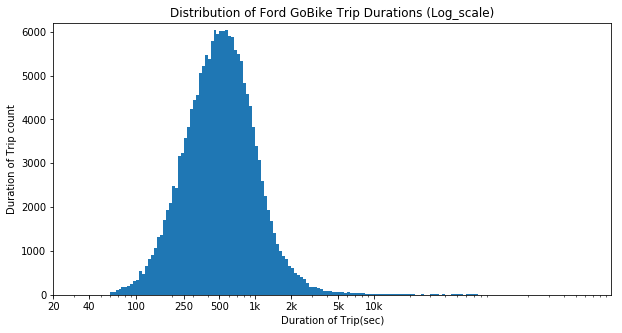

In [3]:
#plotting the Distribution of Ford GoBike Trip Durations using a logarithimic scale
binsize = 0.025
bin_edges = 10 ** np.arange(0.4, np.log10(ford_Gobike_df['duration_sec'].max()) + binsize, binsize)
plt.figure(figsize=[10, 5])
plt.hist(data = ford_Gobike_df, x = 'duration_sec', bins = bin_edges)

#setting up the correspond labels on the plot axis
plt.xlabel('Duration of Trip(sec)')
plt.ylabel('Duration of Trip count')
plt.title('Distribution of Ford GoBike Trip Durations (Log_scale)')

#setting up a logarithm scale
plt.xscale('log')
plt.xticks([ 20, 40, 100, 250, 500, 1e3, 2e3, 5e3, 1e4], [ 20, 40, 100, 250, 500, '1k', '2k', '5k', '10k'])
plt.axis([ 20,1000000, 0, 6200])
plt.show()

## Distribution and Effects of Members Age on Trip Duration

> More than 70% of the total members are between the age of 19 and 45 years old. This members consistituted the high trip duration in  San Francisco Bay Area. 

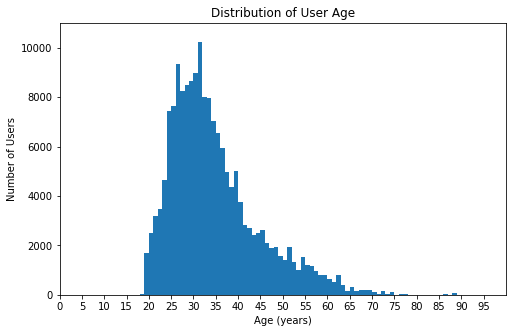

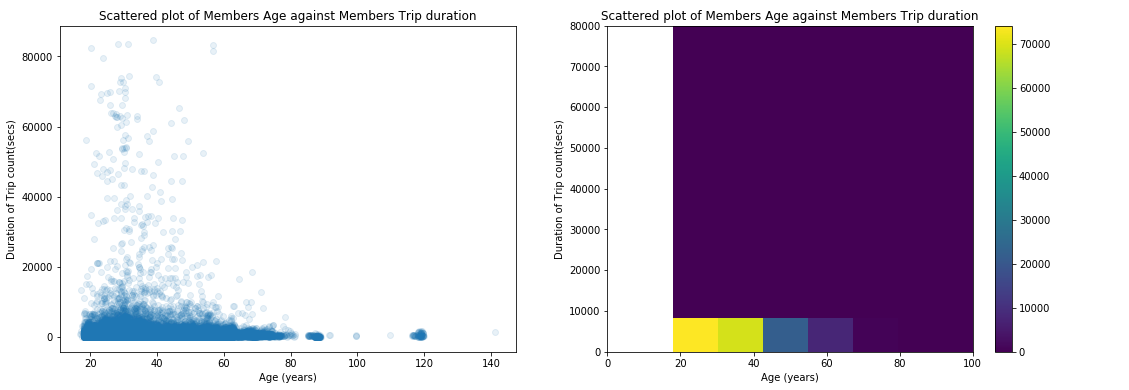

In [4]:
#plotting the distribution of member_age
bin_edges = 1
bins = np.arange(0, ford_Gobike_df['member_age'].astype(int).max()+bin_edges, bin_edges)
plt.figure(figsize=[8, 5])
plt.hist(data = ford_Gobike_df, x = 'member_age', bins = bins)
plt.axis([0, 100, 0, 11000])
plt.xticks(range(0, 100, 5))
plt.title('Distribution of User Age')
plt.xlabel('Age (years)')
plt.ylabel('Number of Users')
plt.show()



plt.figure(figsize = [18, 6])
# PLOT ON LEFT
plt.subplot(1, 2, 1)
sb.regplot(data = ford_Gobike_df, x = 'member_age', y = 'duration_sec', x_jitter= 1, scatter_kws={'alpha':1/10}, fit_reg=False)
plt.xlabel('Age (years)')
plt.ylabel('Duration of Trip count(secs)')
plt.title('Scattered plot of Members Age against Members Trip duration')

# PLOT ON Right
plt.subplot(1, 2, 2)
plt.hist2d(data = ford_Gobike_df, x = 'member_age', y = 'duration_sec')
plt.colorbar(ticks=range(0, 10**6, 10**4))
plt.axis([0,100,0,80000])
plt.xlabel('Age (years)')
plt.ylabel('Duration of Trip count(secs)')
plt.title('Scattered plot of Members Age against Members Trip duration')
plt.show()

## A General Effect of User Type on Trip duration

An average Female and other gender types embark on long trip duration(i.e over 9 mins) while members in male category tend to be lesser. An average customer tends to embark on long trip duration(i.e over 12 minute) as opposed to subscribers that journeyed below 9 mins.


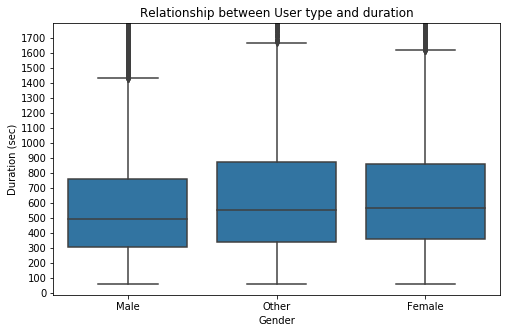

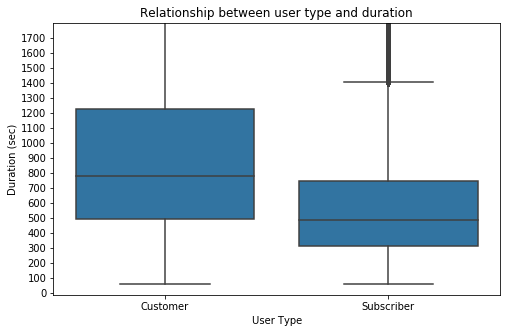

In [5]:
#Plotting the members duration against members genders using appropriate limits

base_color = sb.color_palette()[0]
plt.figure(figsize = [8, 5])
sb.boxplot(data = ford_Gobike_df, x = 'member_gender', y = 'duration_sec', color = base_color)
plt.ylim(-10,1800)
plt.yticks(range(0,1800,100))
plt.xlabel('Gender')
plt.ylabel('Duration (sec)')
plt.title('Relationship between User type and duration')
plt.show()

#Plotting the members duration against user types using appropriate limits

plt.figure(figsize = [8, 5])
sb.boxplot(data = ford_Gobike_df, x = 'user_type', y = 'duration_sec', color = base_color)
plt.ylim(-10,1800)
plt.yticks(range(0,1800,100))
plt.xlabel('User Type')
plt.ylabel('Duration (sec)')
plt.title('Relationship between user type and duration');

## Effect of User Type, Member Age and Start Period on Trip duration

>Trip duration is at first dependent on the age(between 20 and 40 years of age), the members gender(Female embarking on trip duration over 9 mins) and user types(customers embarking more on longer trip duration).
considering the user type, start period and members age, young male subscribers can be seen embarking on a long trip duration in the afternoon. hence subscribers tend to have the highest influence on trip duration.


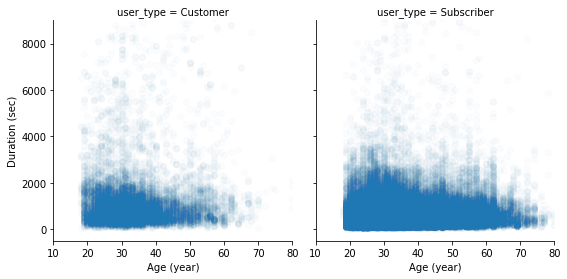

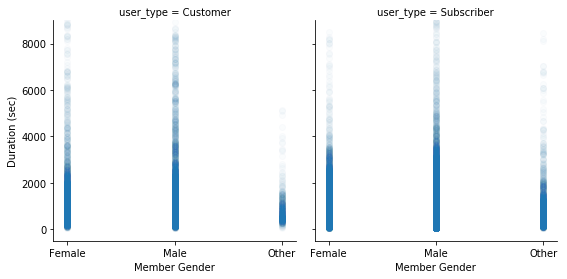

In [6]:
#Plotting the effect of user type and user(members) age against their 
#Trip duration using appropriate limits and faceted scattered plot
usertype_plot_df = sb.FacetGrid(data = ford_Gobike_df, col = 'user_type', col_wrap = 2, size = 4,
                 xlim = [10, 80], ylim = [-500, 9000])
usertype_plot_df.map(plt.scatter, 'member_age', 'duration_sec', alpha=0.02)
usertype_plot_df.set_xlabels('Age (year)')
usertype_plot_df.set_ylabels('Duration (sec)')
plt.show()

#Plotting the effect of user type and user(members) age against their 
#Trip duration using appropriate limits and faceted scattered plot
usertype_plot_df = sb.FacetGrid(data = ford_Gobike_df, col = 'user_type', col_wrap = 2, size = 4,
                  ylim = [-500, 9000])
usertype_plot_df.map(plt.scatter, 'member_gender', 'duration_sec', alpha=0.02)
usertype_plot_df.set_xlabels('Member Gender')
usertype_plot_df.set_ylabels('Duration (sec)')
plt.show()

### Generate Slideshow
Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show.  

# Use this command if you are running this file in local
!jupyter nbconvert Part_II_Explanatory_Analysis.ipynb --to slides --post serve --no-input --no-prompt

> In the classroom workspace, the generated HTML slideshow will be placed in the home folder. 

> In local machines, the command above should open a tab in your web browser where you can scroll through your presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent slide. Make sure you remove all of the quote-formatted guide notes like this one before you finish your presentation! At last, you can stop the Kernel. 